# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm

## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [2]:
data = pd.read_csv ('peer_effects_room.csv')
    
data.head()  

,person,room,high_school_GPA,college_GPA
0,0,351,-1.715472,-1.285307
1,1,738,-0.530190,-0.031833
2,2,247,-0.589543,-0.203230
3,3,751,-1.303115,0.982488
4,4,698,0.156678,-0.371632


In [17]:
# writup code:
# really clever way to solve this problem 
df_double = data.merge(data[['person','room']], 
                    on = 'room',
                    suffixes = ('', '_other')
                    )
print(df_double.sort_values(['room']))

df = df_double[df_double['person'] != df_double['person_other']] # keep only the rows in which the person is unequal the other person
print(df.sort_values(['room']))

      person  room  high_school_GPA  college_GPA  person_other
3870    1757     0        -0.181905     0.566177          1603
3871    1757     0        -0.181905     0.566177          1757
3868    1603     0        -0.622770     0.540078          1603
3869    1603     0        -0.622770     0.540078          1757
1640     466     1        -2.248266    -3.596904           466
...      ...   ...              ...          ...           ...
552      146   998         0.482787     0.702133           146
2260     692   999        -0.058092    -0.211056           692
2262    1810   999        -0.669004     0.755504           692
2263    1810   999        -0.669004     0.755504          1810
2261     692   999        -0.058092    -0.211056          1810

[4000 rows x 5 columns]
      person  room  high_school_GPA  college_GPA  person_other
3869    1603     0        -0.622770     0.540078          1757
3870    1757     0        -0.181905     0.566177          1603
1642    1649     1         0.3

<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [4]:
# [Answer to ex. 12.1.2 here]
copy = data[['person', 'high_school_GPA', 'college_GPA']]
copy= copy.rename(columns={'person':'person_other','high_school_GPA':'high_school_GPA_other','college_GPA':'college_GPA_other'})
copy.head()

,person_other,high_school_GPA_other,college_GPA_other
0,0,-1.715472,-1.285307
1,1,-0.530190,-0.031833
2,2,-0.589543,-0.203230
3,3,-1.303115,0.982488
4,4,0.156678,-0.371632


In [5]:
df = df.merge(copy, on='person_other')
df.sort_values(['room'])

,person,room,high_school_GPA,college_GPA,person_other,high_school_GPA_other,college_GPA_other
1934,1603,0,-0.622770,0.540078,1757,-0.181905,0.566177
1935,1757,0,-0.181905,0.566177,1603,-0.622770,0.540078
821,1649,1,0.378918,0.033256,466,-2.248266,-3.596904
820,466,1,-2.248266,-3.596904,1649,0.378918,0.033256
1286,816,2,-0.798128,-1.811919,1929,-0.095399,-0.052611
...,...,...,...,...,...,...,...
1813,1855,997,0.564039,1.602367,1420,-1.154951,0.628081
277,1740,998,0.197968,-0.178606,146,0.482787,0.702133
276,146,998,0.482787,0.702133,1740,0.197968,-0.178606
1131,1810,999,-0.669004,0.755504,692,-0.058092,-0.211056


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

Text(0.5, 0, 'College GPA')

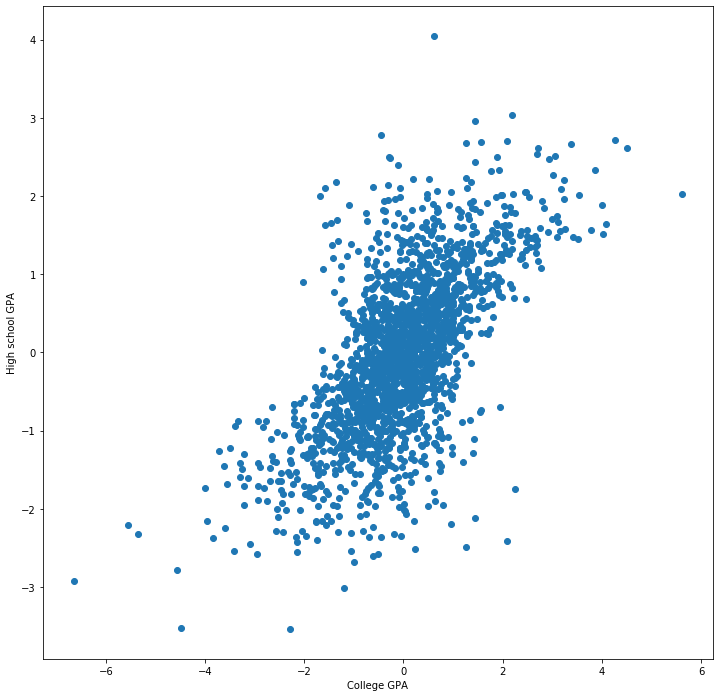

In [6]:
# [Answer to ex. 12.1.3 here]
fig, ax = plt.subplots(figsize=[12,12])
plt.scatter(data['college_GPA'],data['high_school_GPA'])
plt.ylabel('High school GPA')
plt.xlabel('College GPA')

# did not have much time: gonna think more properly about figures. But thanks for the input in the writup

<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

Text(0.5, 0, 'Roommate High school GPA')

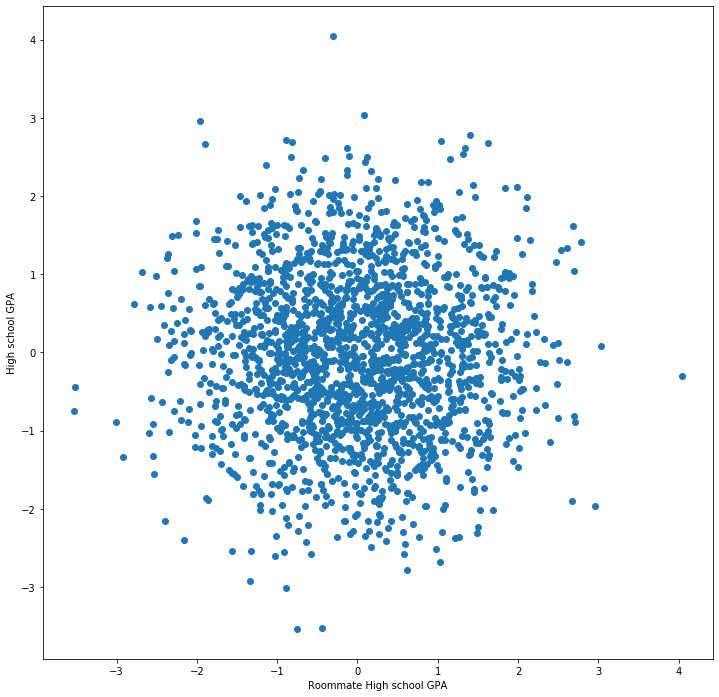

In [7]:
# [Answer to ex. 12.1.4 here]
fig, ax = plt.subplots(figsize=[12,12])
plt.scatter(df['high_school_GPA'],df['high_school_GPA_other'])
plt.ylabel('High school GPA')
plt.xlabel('Roommate High school GPA')

In [11]:
Y = df['high_school_GPA']
X = df['high_school_GPA_other']
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        high_school_GPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Wed, 20 May 2020   Prob (F-statistic):              0.788
Time:                        16:32:54   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0284      0.023     -1.241      0.215      -0.073       0.016
high_school_GPA_other    -0.0060      0.022     -0.269      0.788      -0.050       0.038
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.288
Skew:                           0.015   Prob(JB):                        0.866
Kurtosis:                       2.949   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
results = sm.formula.ols('high_school_GPA ~ high_school_GPA_other', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        high_school_GPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Wed, 20 May 2020   Prob (F-statistic):              0.788
Time:                        16:32:12   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0284      0.023     -1.241      0.215      -0.073       0.016
high_school_GPA_other    -0.0060      0.022     -0.269      0.788      -0.050       0.038
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.288
Skew:                           0.015   Prob(JB):                        0.866
Kurtosis:                       2.949   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

Text(0.5, 0, 'Roommate High school GPA')

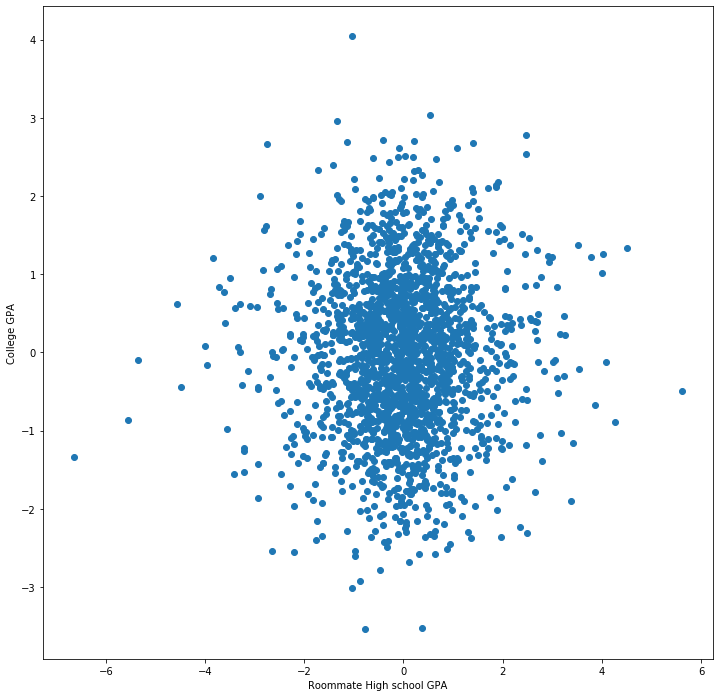

In [12]:
# [Answer to ex. 12.1.5 here]
fig, ax = plt.subplots(figsize=[12,12])
plt.scatter(df['college_GPA'],df['high_school_GPA_other'])
plt.ylabel('College GPA')
plt.xlabel('Roommate High school GPA')

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

In [16]:
# [Answer to ex. 12.1.6 here]
Y = df['college_GPA']
X = df[['high_school_GPA', 'college_GPA_other']]
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            college_GPA   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     680.4
Date:                Wed, 20 May 2020   Prob (F-statistic):          4.46e-226
Time:                        16:34:54   Log-Likelihood:                -2580.6
No. Observations:                2000   AIC:                             5167.
Df Residuals:                    1997   BIC:                             5184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0209      0.020     -1.059      0.290      -0.059       0.018
high_school_GPA       0.7036      0.019     36.574      0.000       0.666       0.741
college_GPA_other     0.0654      0.017      3.788      0.000       0.032       0.099
==============================================================================
Omnibus:                       78.932   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.446
Skew:                          -0.117   Prob(JB):                     2.23e-48
Kurtosis:                       4.606   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
results = sm.formula.ols('college_GPA ~ high_school_GPA + college_GPA_other', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            college_GPA   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     680.4
Date:                Wed, 20 May 2020   Prob (F-statistic):          4.46e-226
Time:                        16:33:22   Log-Likelihood:                -2580.6
No. Observations:                2000   AIC:                             5167.
Df Residuals:                    1997   BIC:                             5184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0209      0.020     -1.059      0.290      -0.059       0.018
high_school_GPA       0.7036      0.019     36.574      0.000       0.666       0.741
college_GPA_other     0.0654      0.017      3.788      0.000       0.032       0.099
==============================================================================
Omnibus:                       78.932   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.446
Skew:                          -0.117   Prob(JB):                     2.23e-48
Kurtosis:                       4.606   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.